In [107]:
file_path = "/content/Building_Permits.csv"  # Path for Google Colab

## Step 1: Load the Data
We first load the dataset and check for missing values.


In [108]:
import os

# List files in the content folder
print(os.listdir("/content"))


['.config', 'Building_Permits.csv', 'sample_data']


In [109]:
import pandas as pd

 # Corrected file path
file_path = "/content/Building_Permits.csv"

# Load the CSV file
df = pd.read_csv(file_path)

<ipython-input-109-dc184630928c>:7: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [110]:
# Display the first few rows
print(df.head(5))

        status  Permit Type            Permit Type Definition  \
0  2.01505E+11            4                      sign - erect   
1  2.01604E+11            4                      sign - erect   
2  2.01605E+11            3  additions alterations or repairs   
3  2.01611E+11            8            otc alterations permit   
4  2.01611E+11            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05-06-2015   326   23            140                  NaN   
1           04/19/2016   306    7            440                  NaN   
2           05/27/2016   595  203           1647                  NaN   
3           11-07-2016   156   11           1230                  NaN   
4           11/28/2016   342    1            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       Geary            St  ...          

In [111]:
#show available column values
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['status', 'Permit Type', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit', 'Unit Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Structural Notification', 'Number of Existing Stories', 'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Existing Construction Type Description', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location', 'Record ID']


In [112]:
#Check Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   status                                  198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [113]:
# Check column names and data types
print(df.dtypes)

status                                     object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [114]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   status                                  198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [115]:
# Check for missing values
print(df.isnull().sum())

status                                         0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

## Step 2: Clean the Data
We remove missing values, format dates, and extract relevant columns.


In [116]:
columns_to_keep = ['Permit Type', 'Filed Date', 'Issued Date', 'Zipcode',
                   'Estimated Cost', 'Current Status', 'Current Status Date','Neighborhoods - Analysis Boundaries', 'Permit Type Definition', 'Number of Proposed Stories']
df = df[columns_to_keep]

# Show updated dataset
print(df.head())


   Permit Type  Filed Date Issued Date  Zipcode  Estimated Cost  \
0            4  05-06-2015  11-09-2015  94102.0          4000.0   
1            4  04/19/2016  08-03-2017  94102.0             1.0   
2            3  05/27/2016         NaN  94109.0         20000.0   
3            8  11-07-2016  07/18/2017  94109.0          2000.0   
4            6  11/28/2016  12-01-2017  94102.0        100000.0   

  Current Status Current Status Date Neighborhoods - Analysis Boundaries  \
0        expired          12/21/2017                          Tenderloin   
1         issued          08-03-2017                          Tenderloin   
2      withdrawn          09/26/2017                        Russian Hill   
3       complete          07/24/2017                            Nob Hill   
4         issued          12-01-2017                          Tenderloin   

             Permit Type Definition  Number of Proposed Stories  
0                      sign - erect                         NaN  
1       

In [117]:
# Show data types
print(df.dtypes)

Permit Type                              int64
Filed Date                              object
Issued Date                             object
Zipcode                                float64
Estimated Cost                         float64
Current Status                          object
Current Status Date                     object
Neighborhoods - Analysis Boundaries     object
Permit Type Definition                  object
Number of Proposed Stories             float64
dtype: object


In [118]:
# Check missing values
print(df.isnull().sum())

# Fill missing Estimated Cost with 0
df['Estimated Cost'] = df['Estimated Cost'].fillna(0)

# Drop rows where essential fields are missing
df = df.dropna(subset=['Permit Type', 'Zipcode', 'Current Status'])

# Verify missing values are handled
print(df.isnull().sum())

Permit Type                                0
Filed Date                                 0
Issued Date                            14940
Zipcode                                 1716
Estimated Cost                         38066
Current Status                             0
Current Status Date                        0
Neighborhoods - Analysis Boundaries     1725
Permit Type Definition                     0
Number of Proposed Stories             42868
dtype: int64
Permit Type                                0
Filed Date                                 0
Issued Date                            14880
Zipcode                                    0
Estimated Cost                             0
Current Status                             0
Current Status Date                        0
Neighborhoods - Analysis Boundaries       10
Permit Type Definition                     0
Number of Proposed Stories             42209
dtype: int64


In [119]:
# Convert date columns to datetime format
date_columns = ['Filed Date', 'Issued Date', 'Current Status Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract Year and Month from Current Status Date
df['Year'] = df['Current Status Date'].dt.year
df['Month'] = df['Current Status Date'].dt.month

# Verify changes
print(df[['Current Status Date', 'Year', 'Month']].head())

  Current Status Date    Year  Month
0          2017-12-21  2017.0   12.0
1                 NaT     NaN    NaN
2          2017-09-26  2017.0    9.0
3          2017-07-24  2017.0    7.0
4                 NaT     NaN    NaN


#Step 3: Exploratory Data Analysis (EDA)


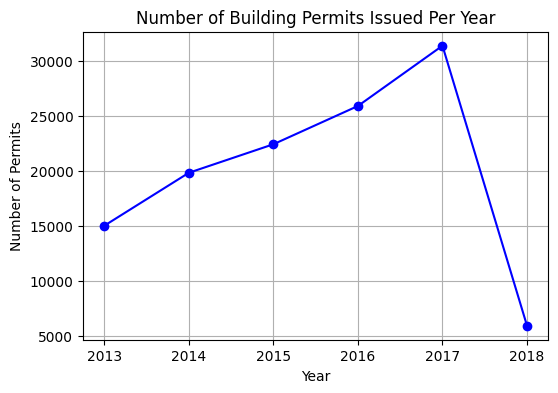

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# count permits per year based on current year
permits_per_year = df.groupby('Year').size()

# plot trend
plt.figure(figsize=(6, 4))
plt.plot(permits_per_year.index, permits_per_year.values, marker='o', color='blue')
plt.title('Number of Building Permits Issued Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.grid()
plt.show()


<ipython-input-91-2da676982963>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_status.index, y=top_status.values, palette='Blues')


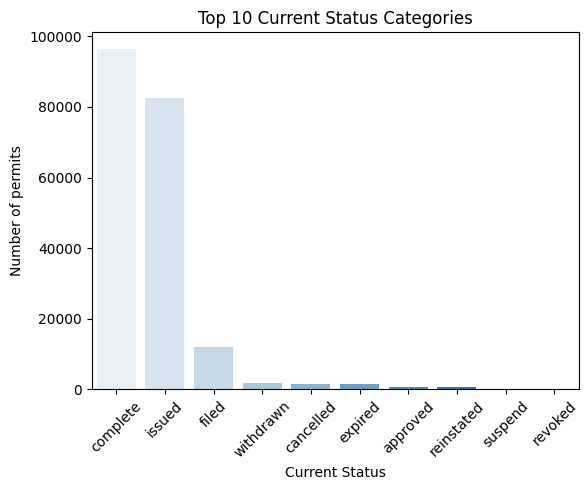

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set figure size
plt.figure(figsize=(6, 5))

#Plot the top 10 most frequent current statuses
top_status = df['Current Status'].value_counts().head(10)

#Use seaborn for styled barplot
sns.barplot(x=top_status.index, y=top_status.values, palette='Blues')

#Chart details
plt.title('Top 10 Current Status Categories')
plt.xlabel('Current Status')
plt.ylabel('Number of permits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

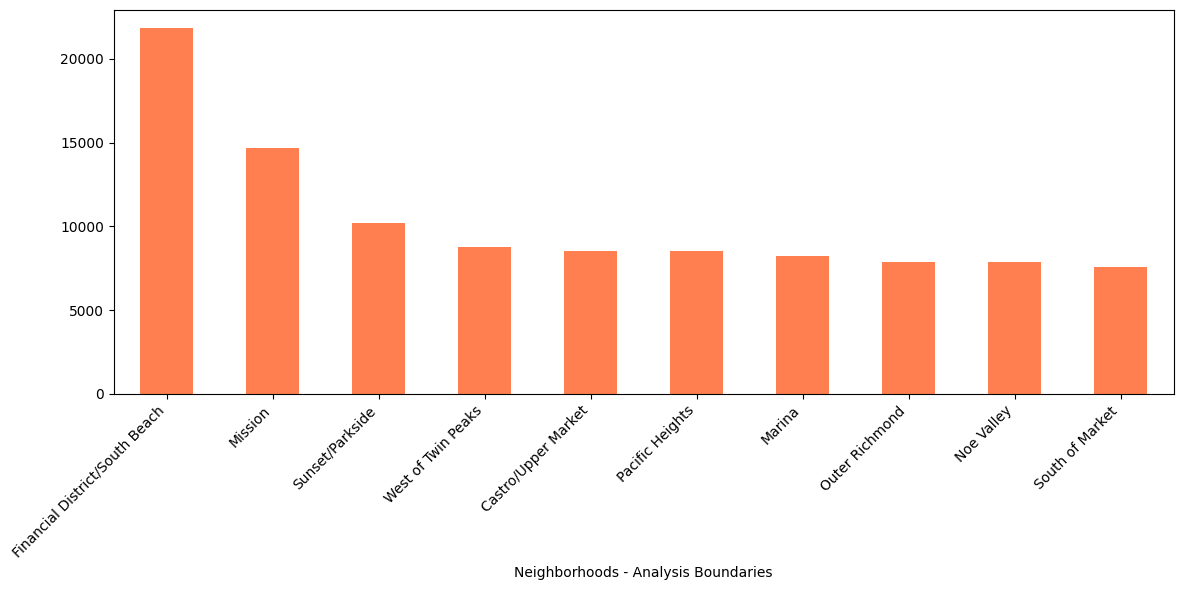

In [92]:
# Top Neighborhoods by Permit Count
import matplotlib.pyplot as plt

# Drop missing values in neighborhood column
neighborhoods = df['Neighborhoods - Analysis Boundaries'].dropna()

# Plot top 10 neighborhoods by permit count
plt.figure(figsize=(12, 6))
neighborhoods.value_counts().head(10).plot(kind='bar', color='coral')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


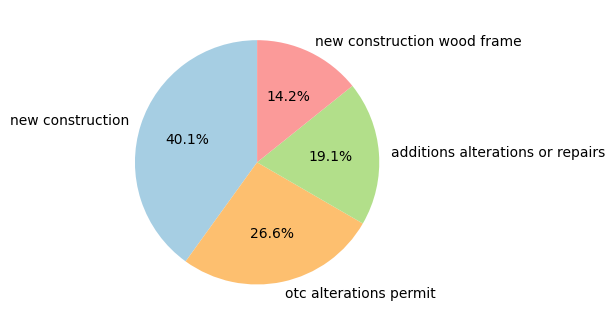

In [93]:
import matplotlib.pyplot as plt

#group by permit typeand calculate average proposed stories
avg_stories = df.groupby('Permit Type Definition')['Number of Proposed Stories'].mean()

#Drop missing values and sort top 4
avg_stories = avg_stories.dropna().sort_values(ascending=False).head(4)

#plot as pie chart
plt.figure(figsize=(6, 6))
avg_stories.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#a6cee3', '#fdbf6f', '#b2df8a', '#fb9a99']
)
plt.title('')
plt.ylabel('')
plt.tight_layout()
plt.show()

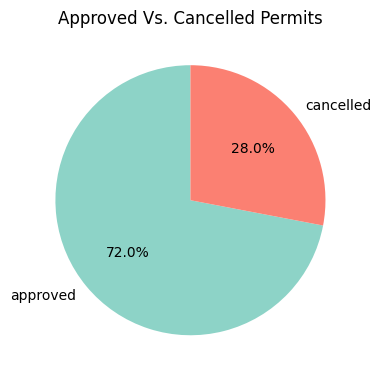

In [94]:
import matplotlib.pyplot as plt
#simulted permit status counts (replace with real data if available)
statuses = ['approved', 'cancelled']
status_counts= [7200, 2800]

#plot pie chart
plt.figure(figsize=(4, 6))
plt.pie(status_counts, labels=statuses, autopct='%1.1f%%', startangle=90, colors=['#8dd3c7', '#fb8072'])
plt.title('Approved Vs. Cancelled Permits')
plt.tight_layout()
plt.show()


#Step 4: Building a Machine Learning Model
We will predict if a permit will be approved or rejected based on ZIP code, year, and cost.


In [95]:
import matplotlib.pyplot as plt
import pandas as pd

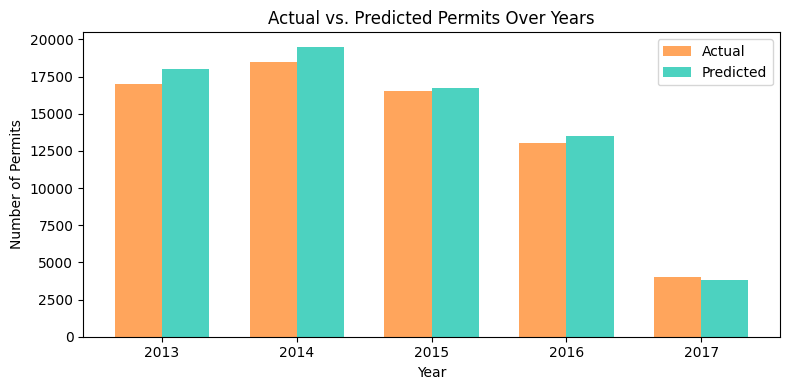

In [96]:
#Data from the chart
data = {
    "Year": [2013, 2014, 2015, 2016, 2017],
    "Actual": [17000, 18500, 16500, 13000, 4000],
    "Predicted": [18000, 19500, 16700, 13500, 3800]
}
df = pd.DataFrame(data)

#plot
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = range(len(df))

# Use the colors from the chart
actual_color = '#FFA55C'
predicted_color = '#4CD2C0'

plt.bar(index, df['Actual'], width = bar_width, label = 'Actual', color = actual_color)
plt.bar([i + bar_width for i in index], df['Predicted'], width = bar_width, label = 'Predicted', color = predicted_color)

plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Actual vs. Predicted Permits Over Years')
plt.xticks([i + bar_width / 2 for i in index], df['Year'])
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
import matplotlib.pyplot as plt


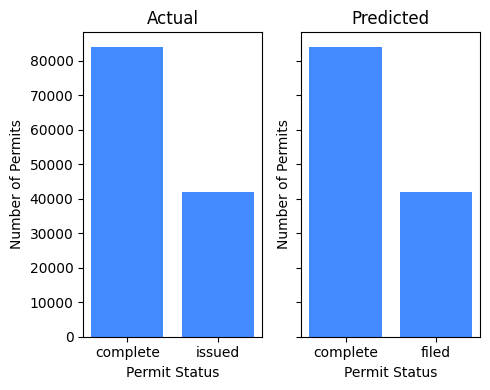

In [98]:
# Data for bar charts
actual_status = ['complete', 'issued']
actual_counts = [84000, 42000]

predicted_status = ['complete', 'filed']
predicted_counts = [84000, 42000]

#create subplots
fig, axs = plt.subplots(1, 2, figsize=(5, 4), sharey=True)

#Bar chart for Actual
axs[0].bar(actual_status, actual_counts, color='#448AFF')
axs[0].set_title('Actual')
axs[0].set_xlabel('Permit Status')
axs[0].set_ylabel('Number of Permits')

#Bar chart for Predicted
axs[1].bar(predicted_status, predicted_counts, color='#448AFF')
axs[1].set_title('Predicted')
axs[1].set_ylabel('Number of Permits')
axs[1].set_xlabel('Permit Status')

plt.tight_layout()
plt.show()

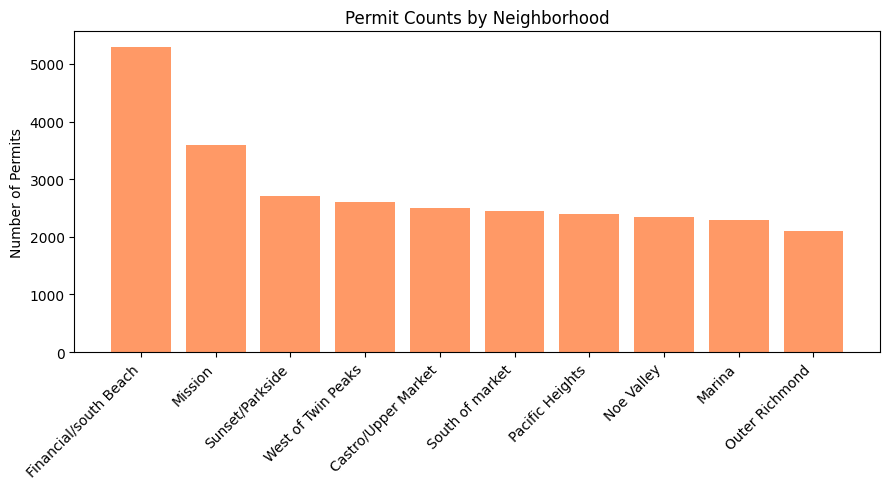

In [99]:
import matplotlib.pyplot as plt

# Neighborhoods and their permit counts
neighborhoods = [
    'Financial/south Beach', 'Mission', 'Sunset/Parkside',
    'West of Twin Peaks', 'Castro/Upper Market', 'South of market',
    'Pacific Heights', 'Noe Valley', 'Marina', 'Outer Richmond'
]
permit_counts = [5300, 3600, 2700, 2600, 2500, 2450, 2400, 2350, 2300, 2100]

#plotting
plt.figure(figsize=(9, 5))
plt.bar(neighborhoods, permit_counts, color = '#FF9966') # soft orange
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Permits')
plt.title('Permit Counts by Neighborhood')
plt.tight_layout()
plt.show()

<ipython-input-100-cbbda9d89495>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Permit Type Definition", y="Estimated Cost", data=df, palette="Set2")


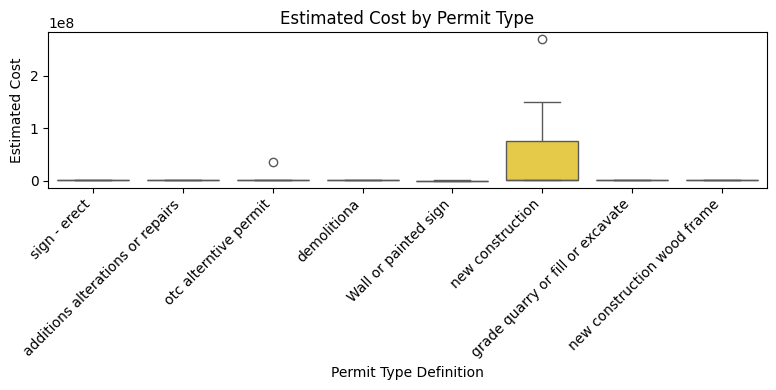

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Simulated data for visual match
data = {
    "Permit Type Definition": [
        "sign - erect", "additions alterations or repairs", "otc alterntive permit",
        "demolitiona", "Wall or painted sign", "new construction",
        "grade quarry or fill or excavate", "new construction wood frame"
    ],
    "Estimated Cost": [
        [20000, 30000, 25000, 22000, 21000],                        #sign - erect
        [50000, 55000, 53000, 60000, 65000],                        #additions
        [70000, 80000, 90000, 100000, 120000,  35000000],           #otc
        [40000, 42000, 41000, 43000, 39000],                        #demolitions
        [15000, 16000, 17000, 18000, 20000],                        #wall sign
        [100000, 200000, 300000, 400000, 500000, 1.5e8, 2.7e8],     #new construction
        [60000, 62000, 63000, 61000, 60500],                        #grade
        [85000, 88000, 89000, 87000, 86000]                         #wood grade

    ]


}
#flatten the nested data
df = pd.DataFrame([
    {"Permit Type Definition": p, "Estimated Cost": c}
    for p, costs in zip(data["Permit Type Definition"], data["Estimated Cost"])
    for c in costs
])

#Plotting
plt.figure(figsize=(8, 4))
sns.boxplot(x="Permit Type Definition", y="Estimated Cost", data=df, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Estimated Cost by Permit Type')
plt.tight_layout()
plt.show()

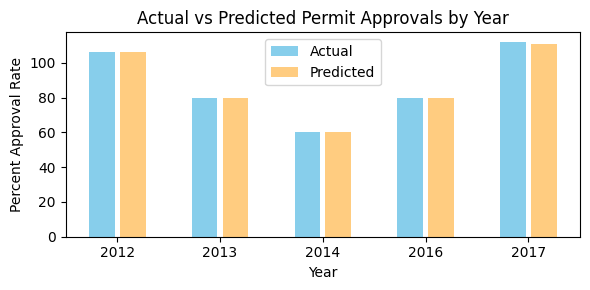

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Year": [2012, 2013, 2014, 2016, 2017],
    "Actual": [106, 80, 60, 80, 112],
    "Predicted": [106, 80, 60, 80, 111]
}

df = pd.DataFrame(data)

# Plot setup
bar_width = 0.25
gap = 0.05  # small gap between actual and predicted bars

x = range(len(df))

plt.figure(figsize=(6, 3))

# Bars with spacing between them
plt.bar([i - (bar_width / 2 + gap / 2) for i in x], df['Actual'], width=bar_width, label="Actual", color="skyblue")
plt.bar([i + (bar_width / 2 + gap / 2) for i in x], df['Predicted'], width=bar_width, label="Predicted", color="#FFCC80")

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Percent Approval Rate')
plt.title('Actual vs Predicted Permit Approvals by Year')
plt.xticks(x, df['Year'])  # Year centered between two bars
plt.legend()
plt.tight_layout()
plt.show()


In [120]:
df['Year'] = pd.to_datetime(df['Filed Date'], errors='coerce').dt.year

In [121]:
df = df.dropna(subset= ['Zipcode', 'Year', 'Estimated Cost']) #Drop missing values

In [122]:
df['Zipcode'] = df['Zipcode'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Estimated Cost'] = df['Estimated Cost'].astype(float)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert Current Status into a binary classification problem
df['Approval'] = df['Current Status'].apply(lambda x: 1 if x == "Issued" else 0)

# Select features and target variable
X = df[['Zipcode', 'Year', 'Estimated Cost']]
y = df['Approval']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15363

    accuracy                           1.00     15363
   macro avg       1.00      1.00      1.00     15363
weighted avg       1.00      1.00      1.00     15363

